In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('cars.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [3]:
df.replace('?',np.nan, inplace=True)

In [4]:
df.iloc[:,[1,11]] =  df.iloc[:,[1,11]].astype('float64')

In [5]:
from sklearn.impute import SimpleImputer

In [6]:
si = SimpleImputer()
df.iloc[:,[1,11]] = si.fit_transform(df.iloc[:,[1,11]])

In [7]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450


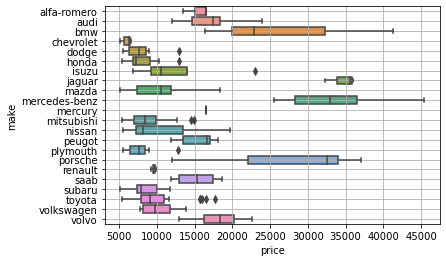

In [8]:
sns.boxplot(df['price'], df['make'])
plt.grid()

In [9]:
df.drop([29,41,45,83,84,124,172,178,179,180], axis=0, inplace=True)

In [10]:
df.drop(181, axis = 0, inplace=True)

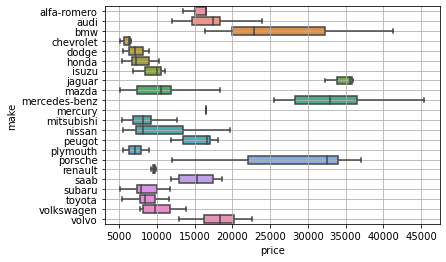

In [11]:
sns.boxplot(df['price'], df['make'])
plt.grid()

In [12]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450


In [13]:
features = df.iloc[:,:-1]
target = df['price']

In [14]:
features.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22


In [15]:
numcols = features.select_dtypes(['int64','float64']).columns

In [16]:
numcols

Index(['symboling', 'normalized-losses', 'width', 'height', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg'],
      dtype='object')

In [17]:
from scipy.stats import skew

In [18]:
skew(features['normalized-losses'])

0.848205953606264

In [19]:
features[numcols]

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg
0,3,122.0,64.1,48.8,130,111.0,21,27
1,3,122.0,64.1,48.8,130,111.0,21,27
2,1,122.0,65.5,52.4,152,154.0,19,26
3,2,164.0,66.2,54.3,109,102.0,24,30
4,2,164.0,66.4,54.3,136,115.0,18,22
...,...,...,...,...,...,...,...,...
200,-1,95.0,68.9,55.5,141,114.0,23,28
201,-1,95.0,68.8,55.5,141,160.0,19,25
202,-1,95.0,68.9,55.5,173,134.0,18,23
203,-1,95.0,68.9,55.5,145,106.0,26,27


In [20]:
for i in features[numcols]:
    print(i)
    print(skew(features[i]))

symboling
0.21386866184357742
normalized-losses
0.848205953606264
width
0.9140400320504322
height
0.013839962443639326
engine-size
2.0541257626466156
horsepower
1.5556576549504106
city-mpg
0.5999073033714895
highway-mpg
0.4760310091695327


symboling column has skewness: 0.21386866184357742
normalized-losses column has skewness: 0.848205953606264
width column has skewness: 0.9140400320504322
height column has skewness: 0.013839962443639326
engine-size column has skewness: 2.0541257626466156
horsepower column has skewness: 1.5556576549504106
city-mpg column has skewness: 0.5999073033714895
highway-mpg column has skewness: 0.4760310091695327


<Figure size 360x144 with 0 Axes>

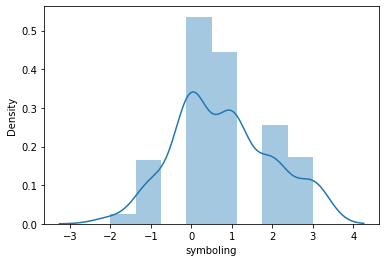

<Figure size 360x144 with 0 Axes>

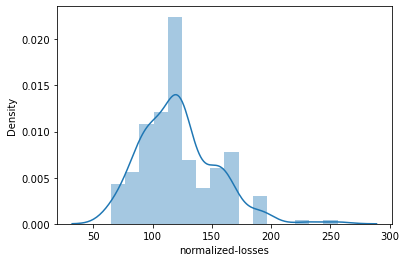

<Figure size 360x144 with 0 Axes>

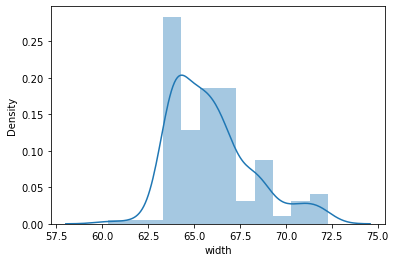

<Figure size 360x144 with 0 Axes>

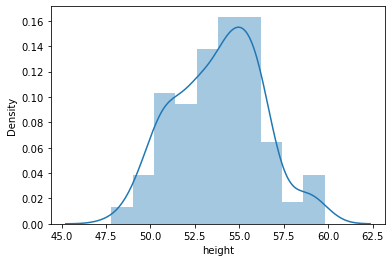

<Figure size 360x144 with 0 Axes>

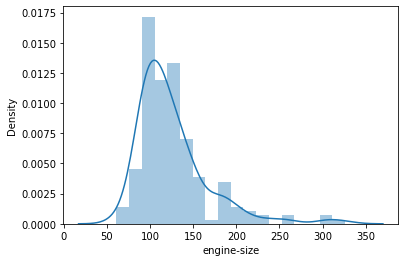

<Figure size 360x144 with 0 Axes>

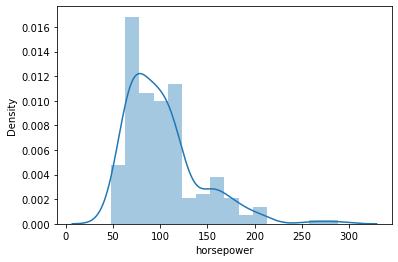

<Figure size 360x144 with 0 Axes>

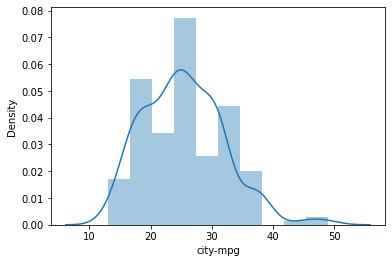

<Figure size 360x144 with 0 Axes>

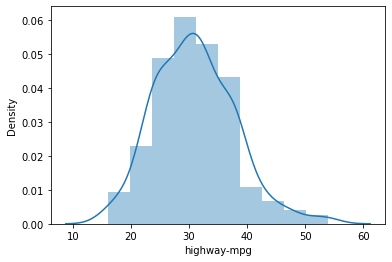

In [21]:
for i in features[numcols]:
    print(f'{i} column has skewness: {skew(features[i])}')
    
    plt.figure(figsize=(5,2))
    plt.figure()
    sns.distplot(features[i])

- Rule 1: If the columns which has skewness and it is correlated with your target column,DO NOT REMOVE SKEWNESS.

- Rule 2: If the skewed column has negative values in it, DO NOT REMOVE THE SKEWNESS

In [22]:
features['symboling']

0      3
1      3
2      1
3      2
4      2
      ..
200   -1
201   -1
202   -1
203   -1
204   -1
Name: symboling, Length: 194, dtype: int64

In [23]:
np.log(-1)

nan

In [24]:
np.sqrt(-1)

nan

In [25]:
pd.concat([features,target], axis=1).corr()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.447922,-0.272388,-0.521495,-0.153671,0.027074,0.007189,0.084238,-0.095905
normalized-losses,0.447922,1.000000,0.066622,-0.368540,0.090258,0.183385,-0.212276,-0.168904,0.129973
width,-0.272388,0.066622,1.000000,0.296011,0.735112,0.643906,-0.641401,-0.677911,0.730503
height,-0.521495,-0.368540,0.296011,1.000000,0.096041,-0.078245,-0.078815,-0.142926,0.147010
engine-size,-0.153671,0.090258,0.735112,0.096041,1.000000,0.803956,-0.642711,-0.667078,0.869638
horsepower,0.027074,0.183385,0.643906,-0.078245,0.803956,1.000000,-0.797166,-0.761009,0.768921
city-mpg,0.007189,-0.212276,-0.641401,-0.078815,-0.642711,-0.797166,1.000000,0.970113,-0.680412
highway-mpg,0.084238,-0.168904,-0.677911,-0.142926,-0.667078,-0.761009,0.970113,1.000000,-0.704846
price,-0.095905,0.129973,0.730503,0.147010,0.869638,0.768921,-0.680412,-0.704846,1.000000


In [26]:
pd.concat([features,target], axis=1).corr().style.background_gradient()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.447922,-0.272388,-0.521495,-0.153671,0.027074,0.007189,0.084238,-0.095905
normalized-losses,0.447922,1.000000,0.066622,-0.368540,0.090258,0.183385,-0.212276,-0.168904,0.129973
width,-0.272388,0.066622,1.000000,0.296011,0.735112,0.643906,-0.641401,-0.677911,0.730503
height,-0.521495,-0.368540,0.296011,1.000000,0.096041,-0.078245,-0.078815,-0.142926,0.147010
engine-size,-0.153671,0.090258,0.735112,0.096041,1.000000,0.803956,-0.642711,-0.667078,0.869638
horsepower,0.027074,0.183385,0.643906,-0.078245,0.803956,1.000000,-0.797166,-0.761009,0.768921
city-mpg,0.007189,-0.212276,-0.641401,-0.078815,-0.642711,-0.797166,1.000000,0.970113,-0.680412
highway-mpg,0.084238,-0.168904,-0.677911,-0.142926,-0.667078,-0.761009,0.970113,1.000000,-0.704846
price,-0.095905,0.129973,0.730503,0.147010,0.869638,0.768921,-0.680412,-0.704846,1.000000


In [27]:
pd.concat([features, target], axis=1).corr()['price'].sort_values()

highway-mpg         -0.704846
city-mpg            -0.680412
symboling           -0.095905
normalized-losses    0.129973
height               0.147010
width                0.730503
horsepower           0.768921
engine-size          0.869638
price                1.000000
Name: price, dtype: float64

In [28]:
skew(features['normalized-losses'])

0.848205953606264

In [29]:
features['normalized-losses'] = np.log(features['normalized-losses'])

In [30]:
skew(features['normalized-losses'])

0.018468899462087518

<AxesSubplot:xlabel='normalized-losses', ylabel='Density'>

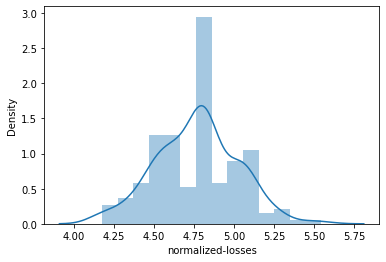

In [31]:
sns.distplot(features['normalized-losses'])

In [32]:
np.log(5)

1.6094379124341003

In [33]:
np.sqrt(5)

2.23606797749979

# Encoding

In [34]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450


In [35]:
#get_dummies
#OneHotEncoder
#LabelEncoding
#OrdinalEncoding

In [36]:
features['fuel-type'].value_counts()

gas       174
diesel     20
Name: fuel-type, dtype: int64

In [37]:
a = pd.DataFrame({
    'cars':['nano','nano','bmw','audi','bmw','audi']
})

In [38]:
a

,cars
0,nano
1,nano
2,bmw
3,audi
4,bmw
5,audi


In [39]:
pd.get_dummies(a['cars'])

,audi,bmw,nano
0,0,0,1
1,0,0,1
2,0,1,0
3,1,0,0
4,0,1,0
5,1,0,0


In [40]:
features

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,4.804021,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
1,3,4.804021,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
2,1,4.804021,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26
3,2,5.099866,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30
4,2,5.099866,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4.553877,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114.0,23,28
201,-1,4.553877,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160.0,19,25
202,-1,4.553877,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134.0,18,23
203,-1,4.553877,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106.0,26,27


In [41]:
features['make'].nunique()

22

In [42]:
pd.get_dummies(features['make'])

,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
pd.get_dummies(features['fuel-type'])

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [44]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [45]:
features.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,4.804021,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
1,3,4.804021,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
2,1,4.804021,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26
3,2,5.099866,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30
4,2,5.099866,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22


In [46]:
oe = OneHotEncoder()

In [47]:
oe.fit_transform(features[['make']]).toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [48]:
features['make'].nunique()

22

In [49]:
target

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 194, dtype: int64

In [50]:
features

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,4.804021,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
1,3,4.804021,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
2,1,4.804021,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26
3,2,5.099866,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30
4,2,5.099866,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4.553877,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114.0,23,28
201,-1,4.553877,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160.0,19,25
202,-1,4.553877,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134.0,18,23
203,-1,4.553877,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106.0,26,27


In [51]:
le = LabelEncoder()
le.fit_transform(features[['make','fuel-type']])

ValueError: y should be a 1d array, got an array of shape (194, 2) instead.

In [52]:
od = OrdinalEncoder()

In [53]:
od.fit_transform(features[['make','fuel-type']])

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 2.,  1.],
       [ 2.,  1.],
       [ 2.,  1.],
       [ 2.,  1.],
       [ 2.,  1.],
       [ 2.,  1.],
       [ 2.,  1.],
       [ 2.,  1.],
       [ 3.,  1.],
       [ 3.,  1.],
       [ 3.,  1.],
       [ 4.,  1.],
       [ 4.,  1.],
       [ 4.,  1.],
       [ 4.,  1.],
       [ 4.,  1.],
       [ 4.,  1.],
       [ 4.,  1.],
       [ 4.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 6.,  1.],
       [ 6.,  1.],
       [ 6.,  1.],
       [ 7.,  1.],
       [ 7.,  1.],
       [ 7.,  1.],
       [ 8.,  1.],
       [ 8.,  1.],
       [ 8.,  1.],
       [ 8.,  1.],
       [ 8.,  1.],
       [ 8.,

In [54]:
catcols = features.select_dtypes(object).columns

In [55]:
features[catcols] = od.fit_transform(features[catcols])

In [56]:
features.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,4.804021,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27
1,3,4.804021,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27
2,1,4.804021,0.0,1.0,2.0,2.0,0.0,65.5,52.4,5.0,152,154.0,19,26
3,2,5.099866,1.0,1.0,3.0,1.0,0.0,66.2,54.3,3.0,109,102.0,24,30
4,2,5.099866,1.0,1.0,3.0,0.0,0.0,66.4,54.3,3.0,136,115.0,18,22


In [57]:
features['make'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21.])

# Feature Scaling/ Data Scaling

In [58]:
n1 = 10 #kg
n2 = 1000 #gram

n1>n2

False

In [59]:
n1 = 1 

n2 = 60

n1>n2

False

1. Normalization (MinMaxScaler)
    - Range 0 to 1
    - Formula : xnew = (x-min)/(max-min)
    

2. Standardization (StandardScaler)
     - Formula : x -xmean/std(x)
     - mean =0 and std =1

In [60]:
a = np.array([1,2,3,4,5])
b = np.array([10,20,30,40,50])
c = np.array([100,200,300,400,500])

In [61]:
def scaler(arr):
    xnew = (arr-arr.min())/(arr.max()-arr.min())
    return xnew

In [62]:
scaler(a)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [63]:
scaler(b)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [64]:
scaler(c)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
mn = MinMaxScaler()

In [67]:
features.iloc[:,:] = mn.fit_transform(features.iloc[:,:])

In [68]:
features.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,1.0,0.459322,0.000000,1.0,0.00,1.0,0.0,0.316667,0.083333,0.000000,0.260377,0.262500,0.222222,0.289474
1,1.0,0.459322,0.000000,1.0,0.00,1.0,0.0,0.316667,0.083333,0.000000,0.260377,0.262500,0.222222,0.289474
2,0.6,0.459322,0.000000,1.0,0.50,1.0,0.0,0.433333,0.383333,0.833333,0.343396,0.441667,0.166667,0.263158
3,0.8,0.675143,0.047619,1.0,0.75,0.5,0.0,0.491667,0.541667,0.500000,0.181132,0.225000,0.305556,0.368421
4,0.8,0.675143,0.047619,1.0,0.75,0.0,0.0,0.508333,0.541667,0.500000,0.283019,0.279167,0.138889,0.157895


In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
#sc =StandardScaler

#features.iloc[:,:] = sc.fit_transform(features.iloc[:,:])

# Feature Engineering

- Feature engineering is a method of creating new columns based on existing columns.
- It requires domain knowledge.

In [71]:
features['width'] * features['height']

0      0.026389
1      0.026389
2      0.166111
3      0.266319
4      0.275347
         ...   
200    0.459861
201    0.454514
202    0.459861
203    0.459861
204    0.459861
Length: 194, dtype: float64

In [72]:
features['Area'] = features['width'] *features['height']

In [73]:
features.drop(columns=['width','height'], inplace=True)

In [75]:
features.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,engine-size,horsepower,city-mpg,highway-mpg,Area
0,1.0,0.459322,0.000000,1.0,0.00,1.0,0.0,0.000000,0.260377,0.262500,0.222222,0.289474,0.026389
1,1.0,0.459322,0.000000,1.0,0.00,1.0,0.0,0.000000,0.260377,0.262500,0.222222,0.289474,0.026389
2,0.6,0.459322,0.000000,1.0,0.50,1.0,0.0,0.833333,0.343396,0.441667,0.166667,0.263158,0.166111
3,0.8,0.675143,0.047619,1.0,0.75,0.5,0.0,0.500000,0.181132,0.225000,0.305556,0.368421,0.266319
4,0.8,0.675143,0.047619,1.0,0.75,0.0,0.0,0.500000,0.283019,0.279167,0.138889,0.157895,0.275347


In [76]:
x = features

y = target

In [85]:
from sklearn.model_selection import train_test_split

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.75)

In [81]:
x.shape

(194, 13)

In [82]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(145, 13)
(49, 13)
(145,)
(49,)


In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
lr = LinearRegression()

In [89]:
model = lr.fit(x_train,y_train)

In [97]:
ypred = model.predict(x_test)

In [94]:
ypred

array([ 7127.30510462, 15651.80018364,  5706.74199326, 16535.80231048,
        6958.42566869,  7727.04016742,  6916.06669719, 10679.13306723,
       36813.47593279, 19470.14581855, 27743.65283182, 25188.9813499 ,
       15443.48526496, 13906.49815832,  8471.71777512, 13606.23538412,
       31669.47578392, 15810.12498351,  7980.84681881,  6046.66456032,
        7623.46094861, 15840.33874698, 10075.33095236, 13909.16061618,
       28014.9549797 , 30060.77689433,  6596.73812901, 19625.26432061,
        4932.9285889 ,  7506.59740133,  8260.23839624, 15443.48526496,
       10617.50155758,  7473.73787391, 16935.83164732, 12298.46678361,
        7356.68315579,  3778.08026257, 21477.82056212, 15753.13907912,
       36813.47593279, 13265.53364036, 17363.8345759 , 11109.7107952 ,
       30172.42710552, 20873.62190464,  7782.38051828, 21058.00564344,
       12746.46424566])

In [102]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error, accuracy_score

In [101]:
print('The r2 is: ', r2_score(y_test,ypred))
mean_absolute_error(y_test,ypred)

The r2 is:  0.9131480715698977


2119.2618481887507